In [1]:
import numpy as np
import matplotlib.pyplot as plt
import lbg_forecast.sfh as sfh
import torchvision
import gpytorch
import torch
from duste.DustAttnCalc import DustAttnCalc
import duste.DustAttnCalc as dd
import lbg_forecast.dust_priors as dp
import scipy as sc

import lbg_forecast.priors_gp_dust as gpdp

In [2]:
dust_prior = gpdp.DustPrior('./')
n, tau, tau1, ne, taue, tau1e, sfr = dust_prior.n, dust_prior.tau, dust_prior.tau1, dust_prior.ne, dust_prior.taue, dust_prior.tau1e, dust_prior.sfr
recent_sfrs, dust2, dust_index, dust1 = dust_prior.recent_sfrs, dust_prior.dust2, dust_prior.dust_index, dust_prior.dust1

Loading Models
Loading Complete


<ErrorbarContainer object of 3 artists>

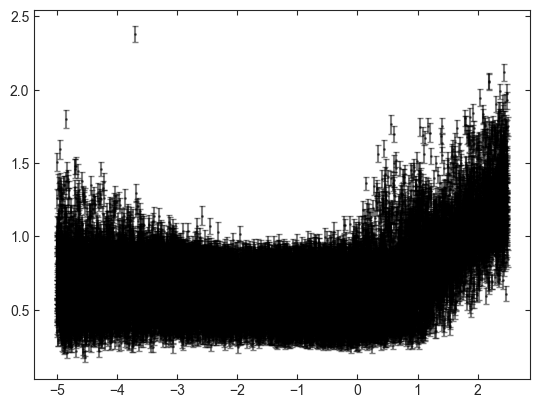

In [3]:
plt.errorbar(sfr, tau, taue, fmt='ko', ms=1, capsize=2, alpha=0.5, zorder=-1)
bin_centers_de, bin_means_de, bin_std_de = gpdp.process_samples(sfr, tau, -10, -5, 5)
plt.errorbar(bin_centers_de, bin_means_de, bin_std_de, fmt='ro', capsize=2)

<ErrorbarContainer object of 3 artists>

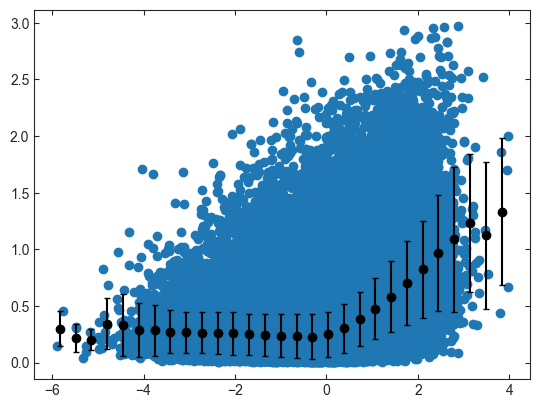

In [4]:
plt.scatter(recent_sfrs, dust2)
bin_centers, bin_means, bin_std = gpdp.process_samples(recent_sfrs, dust2, -6, 4, 30)
plt.errorbar(bin_centers, bin_means, bin_std, fmt='ko', capsize=2)
plt.errorbar(bin_centers_de, bin_means_de, bin_std_de, fmt='ro', ms=1, capsize=2)

In [5]:
train_sfrs, train_dust2, train_dust2_errs = gpdp.training_data_to_torch(bin_centers, bin_means, bin_std, bin_centers_de, bin_means_de, bin_std_de)
#avg_err = (bin_std + bin_std_de)/2
#x, y, yerr = gpdp.process_samples(train_sfrs, train_dust2, -4, 2.5, 25)
#plt.errorbar(bin_centers, bin_means, bin_std, fmt='ko', capsize=2, alpha=0.25)
#plt.errorbar(bin_centers_de, bin_means_de, bin_std_de, fmt='ro', capsize=2, alpha=0.25)
#plt.errorbar(x, y, yerr, fmt='bo', capsize=2)

17.530815625793295
12.518153919859042
8.25808937904399
4.897156777774211
2.5594430720500214
1.3069986373282398
1.0372530709061545
0.9943768755029678
0.95171841641818
0.909198233896264
0.8667747775857878
0.8244328536817626
0.782175979537784
0.7400208284454842
0.6979927808625221
0.6561220414469584
0.6144400726792398
0.5729763409304516
0.5317555936085276
0.49079603139944544
0.45010869214814575
0.4096980439976561
0.369563305249775
0.32969969210573347
0.2900989374342326
0.2507489833778459
0.21163337228840823
0.172731192059529
0.13401835297174106
0.09547056742857828
0.05706783983323189
0.018799736704561365
-0.019329631349561296
-0.05729801036909994
-0.09506358855481727
-0.13256606624651904
-0.16972996993689432
-0.20646954835890224
-0.24269437066791139
-0.2783147377502103
-0.3132461703548155
-0.34741248549711395
-0.3807472525636357
-0.4131936831679863
-0.4447032194850053
-0.47523322438464244
-0.504744236843994
-0.5331972441242332
-0.560551354363453
-0.58676215152415
-0.6117809014761001
-0.635

/Users/fpetri/anaconda3/envs/tf_env/lib/python3.11/site-packages/linear_operator/utils/cholesky.py:40: NumericalWarning: A not p.d., added jitter of 1.0e-08 to the diagonal
  warnings.warn(


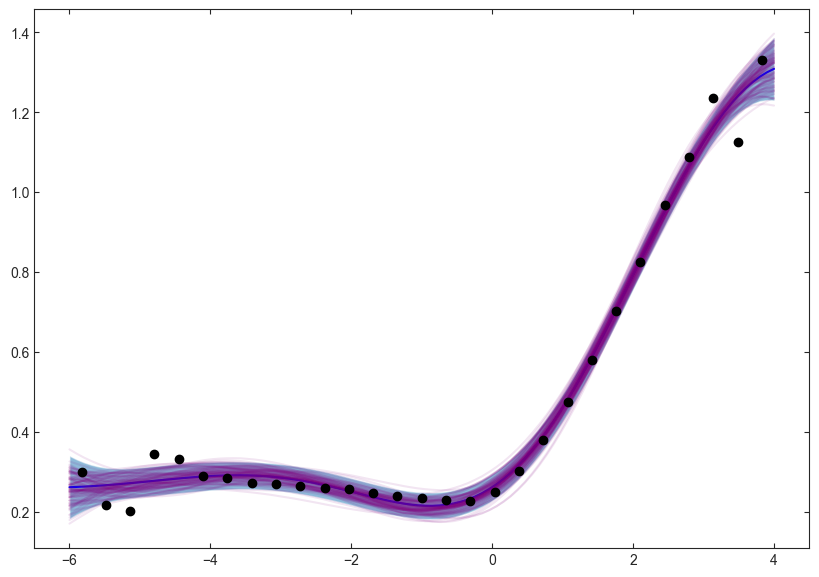

In [6]:
#train_sfrs, train_dust2, train_dust2_errs = torch.from_numpy(x), torch.from_numpy(y), torch.from_numpy(yerr)
test_sfrs = torch.linspace(-6, 4, 100)
trained_model, trained_likelihood = gpdp.train_gp_model_noerr(train_sfrs, train_dust2, [1.0, 15.0], [-100, 100], lr=0.1, training_iter=10000)
f_preds_mu = gpdp.gp_evaluate_model(trained_model, test_sfrs)
gpdp.gp_plot_confidence_obs(f_preds_mu, test_sfrs, train_sfrs, train_dust2, train_dust2_errs*0, labelx="", labely="", alpha=0.5)

for param_name, param in trained_model.named_parameters():
    print(f'Parameter name: {param_name:42} value = {param.item()}')


with torch.no_grad():
    for i in range(100):
        plt.plot(test_sfrs, f_preds_mu.sample().numpy(), c='purple', alpha=0.1)

17.51332144743939
12.499863519068564
8.23889581843689
4.876936903994719
2.5380509531487943
1.2842519678532702
1.0129283395841409
0.968263230423265
0.9235762919802354
0.8787737649520673
0.8337968673102585
0.788611397826071
0.743201191861806
0.6975637915921159
0.6517074585314971
0.6056490355157147
0.5594123650220262
0.5130270810002759
0.4665276544433738
0.4199526098158002
0.3733438513099582
0.3267460509637273
0.28020605877095156
0.23377230071795913
0.1874941364090384
0.14142115577880401
0.09560240657521714
0.05008556289290353
0.004916071090542546
-0.03986365857836654
-0.084214914534934
-0.12810308148047714
-0.1714976650305608
-0.2143718928398936
-0.2567019477079184
-0.2984660188065821
-0.3396434617716193
-0.3802143794091538
-0.4201598409229246
-0.4594627670669532
-0.4981092831348086
-0.5360901556872215
-0.5734018379059349
-0.6100466747045626
-0.6460319544138878
-0.6813677104174566
-0.7160634312157741
-0.7501240797024499
-0.7835459986904808
-0.8163133467880719
-0.8483956473974262
-0.87974

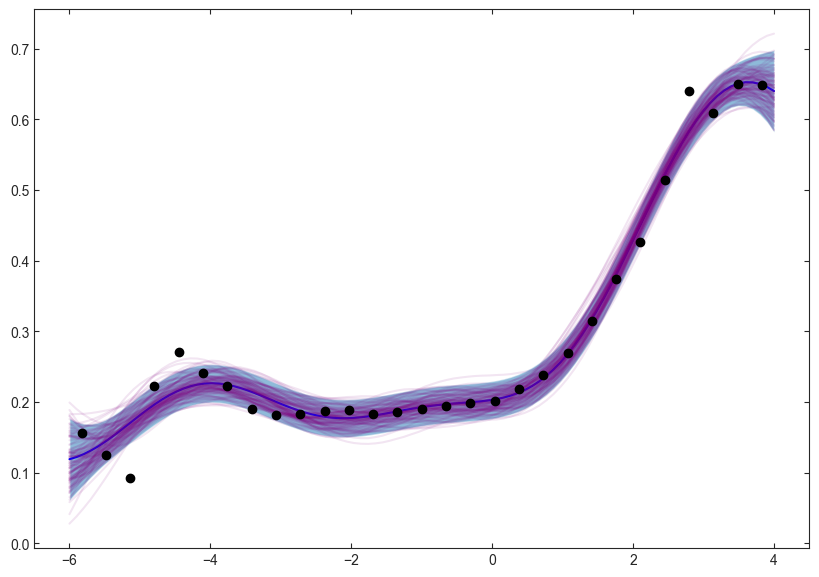

In [7]:
test_sfrs = torch.linspace(-6, 4, 100)
train_sfrs, train_dust2, train_dust2_errs = gpdp.training_data_to_torch(bin_centers, bin_means, bin_std, bin_centers_de, bin_means_de, bin_std_de)

trained_model_sig, trained_likelihood_sig = gpdp.train_gp_model_noerr(train_sfrs, train_dust2_errs, [1.0, 15.0], [-100, 100], lr=0.1, training_iter=10000)
f_preds = gpdp.gp_evaluate_model(trained_model_sig, test_sfrs)
gpdp.gp_plot_confidence_obs(f_preds, test_sfrs, train_sfrs, train_dust2_errs, train_dust2_errs*0, labelx="", labely="", alpha=0.5)
for param_name, param in trained_model.named_parameters():
    print(f'Parameter name: {param_name:42} value = {param.item()}')

with torch.no_grad():
    for i in range(100):
        plt.plot(test_sfrs, f_preds.sample().numpy(), c='purple', alpha=0.1)

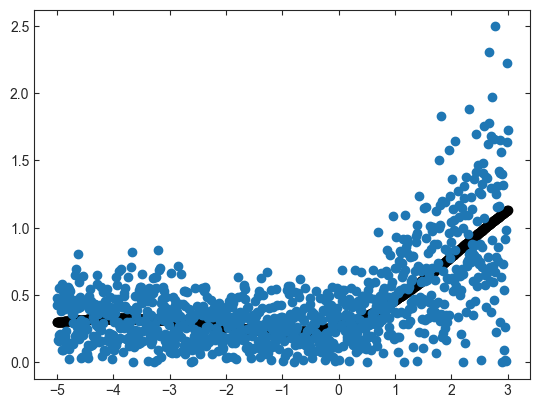

In [8]:
test_sfrs = torch.from_numpy(np.linspace(-5, 3, 1000))
#mean = np.interp(test_sfrs, train_sfrs, train_dust2)
f_preds_mu = gpdp.gp_evaluate_model(trained_model, test_sfrs)
f_preds_sig = gpdp.gp_evaluate_model(trained_model_sig, test_sfrs)
mean_dust2 = f_preds_mu.sample().numpy()
sig_dust2 = f_preds_sig.sample().numpy()
sig_dust2 = np.where(sig_dust2<0.001, 0.001, sig_dust2)
plt.scatter(test_sfrs, mean_dust2, c='k')
plt.scatter(test_sfrs, dp.truncated_normal(mean_dust2, sig_dust2, 0.0, 4.0, len(test_sfrs)))

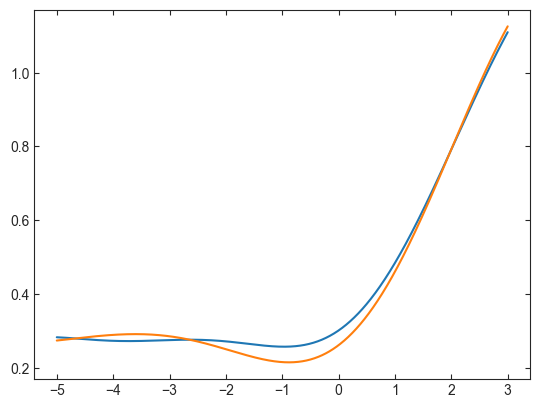

In [10]:
recent_sfrs, dust2, dust_index, dust1 = dust_prior.get_pop_cosmos_samples(9999999999)
f_preds_mu = gpdp.gp_evaluate_model(trained_model, torch.from_numpy(dust_prior.dust2_grid))
mean_dust2_sample = f_preds_mu.sample().numpy()
mean_dust2 = f_preds_mu.mean.detach().numpy()
delta_dust2 = mean_dust2_sample - mean_dust2
plt.plot(dust_prior.dust2_grid, mean_dust2_sample)
plt.plot(dust_prior.dust2_grid, mean_dust2)

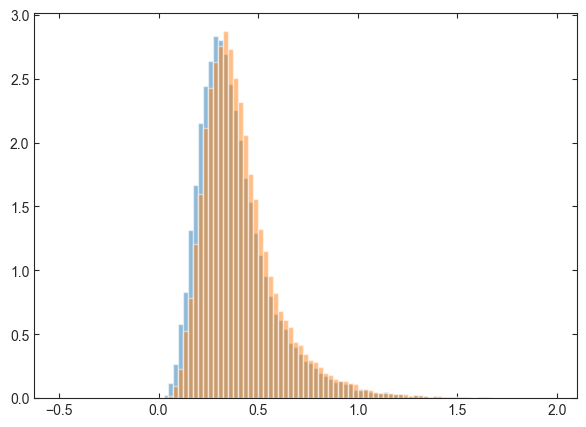

In [11]:

recent_sfrs, dust2, dust_index, dust1 = dust_prior.get_pop_cosmos_samples(9999999999)
delta = np.interp(recent_sfrs, dust_prior.dust2_grid, delta_dust2)
sfrs = np.random.uniform(-6, 4, 1000000)
sorted_inds = recent_sfrs.argsort()[:]
sorted_sfrs = recent_sfrs[sorted_inds]
sorted_dust2 = dust2[sorted_inds]
sorted_delta = delta[sorted_inds]

dust2 = np.interp(sfrs, sorted_sfrs, sorted_dust2)
delta = np.interp(sfrs, sorted_sfrs, sorted_delta)

sfr_point = 1
inds = np.where((sfrs<sfr_point)&(sfrs>sfr_point-0.5))[0]

f, ax = plt.subplots(1, 1, figsize=(7, 5))
bins = np.arange(-0.5, 2, 0.025)
histogram = ax.hist(dust2[inds], density=True, bins=bins, alpha=0.5)
dust2 = abs(dust2 + delta)
histogram = ax.hist(dust2[inds], density=True, bins=bins, alpha=0.5)

In [12]:
torch.save(trained_model.state_dict(), 'gp_models/dust2.pth')
torch.save(trained_model_sig.state_dict(), 'gp_models/dust2sig.pth')

<ErrorbarContainer object of 3 artists>

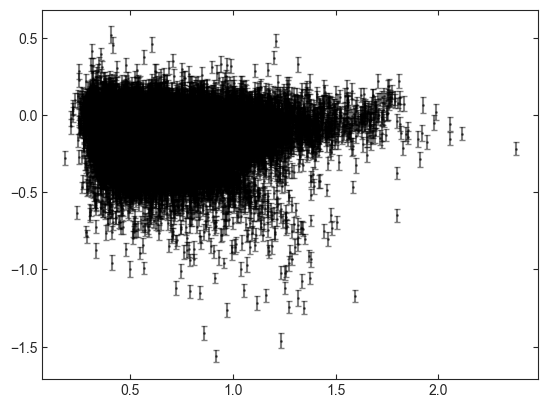

In [13]:
bin_centers_de, bin_means_de, bin_std_de = gpdp.process_samples(tau, n, -10, -5, 2)
plt.errorbar(bin_centers_de, bin_means_de, bin_std_de, fmt='ro', capsize=2)
plt.errorbar(tau, n, ne, fmt='ko', ms=1, capsize=2, alpha=0.5, zorder=-1)

<ErrorbarContainer object of 3 artists>

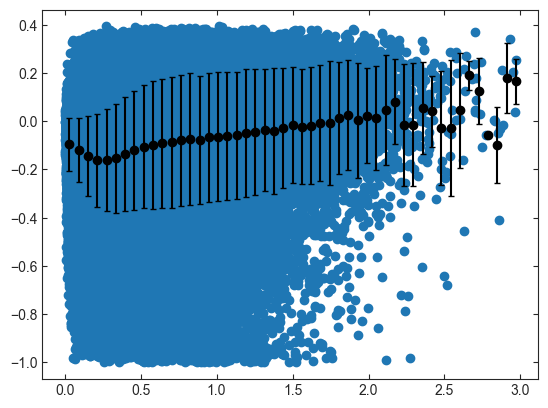

In [15]:
recent_sfrs, dust2, dust_index, dust1 = dust_prior.get_pop_cosmos_samples(9999999999)
plt.scatter(dust2, dust_index)

bin_centers, bin_means, bin_std = gpdp.process_samples(dust2, dust_index, 0.0, 3.0, 50)

plt.errorbar(bin_centers, bin_means, bin_std, fmt='ko', capsize=2)
plt.errorbar(bin_centers_de, bin_means_de, bin_std_de, fmt='ro', ms=1, capsize=2)

In [16]:
train_dust2, train_dust_index, train_dust_index_errs = gpdp.training_data_to_torch(bin_centers, bin_means, bin_std, bin_centers_de, bin_means_de, bin_std_de)
#avg_err = (bin_std + bin_std_de)/2
#x, y, yerr = gpdp.process_samples(train_sfrs, train_dust_index, 0.0, 3.0, 50)
#plt.errorbar(bin_centers, bin_means, bin_std, fmt='ko', capsize=2, alpha=0.25)
#plt.errorbar(bin_centers_de, bin_means_de, bin_std_de, fmt='ro', capsize=2, alpha=0.25)
#plt.errorbar(x, y, yerr, fmt='bo', capsize=2)

175.27359279764667
161.83302812854808
148.3129584691558
134.8006107687141
121.39134440930252
108.18777227526151
95.2984949243624
82.8364059131756
70.91653286435422
59.653388575720534
49.1578206833318
39.53336984452865
30.87217902242528
23.25054495153815
16.724272008603457
11.324081464348222
7.0514431088543965
3.8753187912188416
1.7304100761734948
0.5175388730614845
0.10670342979720106
0.05821429243519215
0.009711335115894148
-0.03887380418091882
-0.08750519334944064
-0.13614380036090723
-0.1847477203646993
-0.2332722954453012
-0.281670148437995
-0.32989114826073823
-0.3778823215270668
-0.42558772344086715
-0.47294827991796334
-0.5199016123678055
-0.5663818564682103
-0.6123194864610291
-0.6576411568796445
-0.7022695740915561
-0.7461234105182238
-0.7891172748314683
-0.8311617518375413
-0.8721635262686723
-0.9120256055780152
-0.9506476585225427
-0.9879264894170836
-1.0237566730889416
-1.0580313831930779
-1.0906434565196774
-1.1214867470548717
-1.150457833219202
-1.1774581457398299
-1.2023

/Users/fpetri/anaconda3/envs/tf_env/lib/python3.11/site-packages/linear_operator/utils/cholesky.py:40: NumericalWarning: A not p.d., added jitter of 1.0e-08 to the diagonal
  warnings.warn(


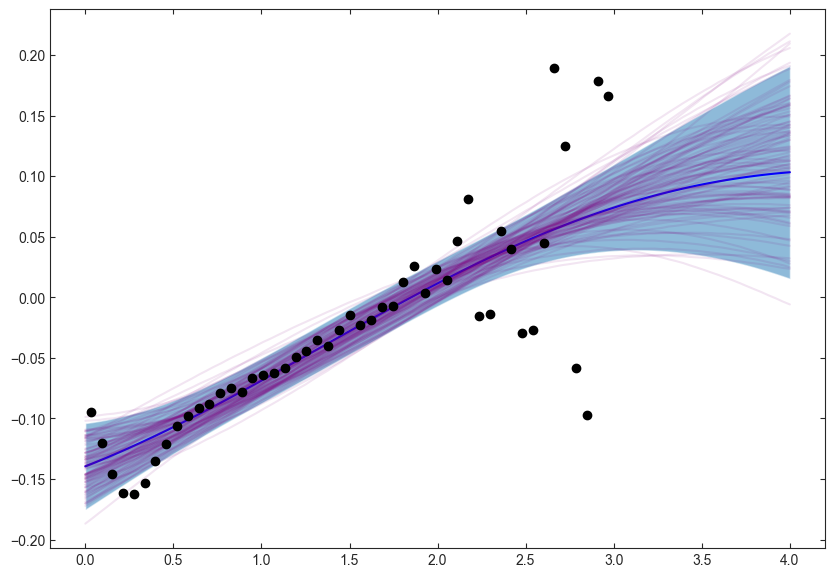

In [17]:
#train_dust2, train_dust_index, train_dust_index_errs = torch.from_numpy(bin_centers), torch.from_numpy(bin_means), torch.from_numpy(bin_std)

test_dust2 = torch.linspace(0, 4, 100)
#train_dust2, train_dust_index, train_dust_index_errs = gpdp.training_data_to_torch(bin_centers, bin_means, bin_std, x, y, yerr)

trained_model, trained_likelihood = gpdp.train_gp_model_noerr(train_dust2, train_dust_index, [2.0, 10.0], [-100, 100], lr=0.1, training_iter=10000)
f_preds = gpdp.gp_evaluate_model(trained_model, test_dust2)
gpdp.gp_plot_confidence_obs(f_preds, test_dust2, train_dust2, train_dust_index, train_dust_index_errs*0, labelx="", labely="", alpha=0.5)
for param_name, param in trained_model.named_parameters():
    print(f'Parameter name: {param_name:42} value = {param.item()}')

with torch.no_grad():
    for i in range(100):
        plt.plot(test_dust2, f_preds.sample().numpy(), c='purple', alpha=0.1)

175.2733217510862
161.8327486336186
148.31266908265843
134.80030839080436
121.39102500586148
108.18743185144515
95.29813040672381
82.83601574183386
70.91611726987692
59.652949615716715
49.157362125246124
39.53289694355651
30.87169820259604
23.25006337901411
16.72379705232865
11.32362006137421
7.051001078502175
3.8749001645866237
1.7300165194823647
0.5171692811671388
0.10635374732109824
0.05789646011859629
0.009425653043501446
-0.039127558640178875
-0.08772751310141429
-0.13633552592976014
-0.18491017410623828
-0.23340747588990476
-0.2817809924814333
-0.3299818738542878
-0.3779588691472567
-0.42565832123877156
-0.47302416539404374
-0.5199979530365662
-0.5665189235754913
-0.6125241495792729
-0.6579487830378364
-0.7027264323611139
-0.7467897000814824
-0.7900709083371789
-0.8325030307128306
-0.874020831616776
-0.9145621840859901
-0.9540694898346421
-0.9924910596874295
-1.0297822321394465
-1.0659059272946054
-1.1008322828317194
-1.1345370426065675
-1.1669985138651275
-1.1981931972504392
-1.

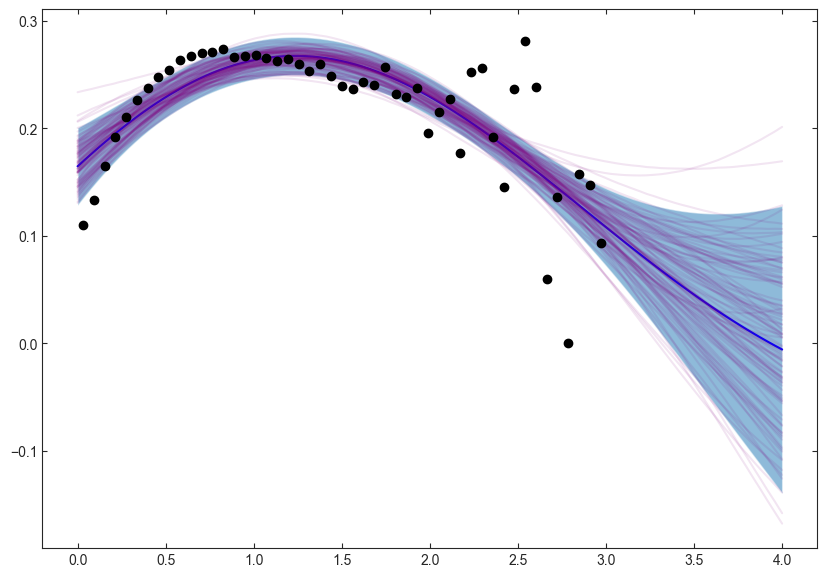

In [18]:
test_dust2 = torch.linspace(0, 4, 100)
train_dust2, train_dust_index, train_dust_index_errs = gpdp.training_data_to_torch(bin_centers, bin_means, bin_std, bin_centers_de, bin_means_de, bin_std_de)

trained_model_sig, trained_likelihood_sig = gpdp.train_gp_model_noerr(train_dust2, train_dust_index_errs, [2.0, 10.0], [-100, 100], lr=0.1, training_iter=10000)
f_preds = gpdp.gp_evaluate_model(trained_model_sig, test_dust2)
gpdp.gp_plot_confidence_obs(f_preds, test_dust2, train_dust2, train_dust_index_errs, train_dust_index_errs*0, labelx="", labely="", alpha=0.5)
for param_name, param in trained_model.named_parameters():
    print(f'Parameter name: {param_name:42} value = {param.item()}')

with torch.no_grad():
    for i in range(100):
        plt.plot(test_dust2, f_preds.sample().numpy(), c='purple', alpha=0.1)

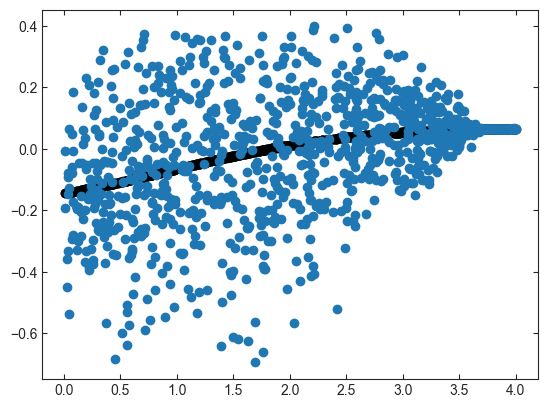

In [19]:
test_tau = torch.from_numpy(np.random.uniform(0, 4, 1000))
f_preds = gpdp.gp_evaluate_model(trained_model, test_tau)
f_preds_sig = gpdp.gp_evaluate_model(trained_model_sig, test_tau)
mean_dust_index = f_preds.sample().numpy()
sig_dust_index = f_preds_sig.sample().numpy()
sig_dust_index = np.where(sig_dust_index<0.001, 0.001, sig_dust_index)
#scatter = np.random.uniform(0.1, 0.4)
plt.scatter(test_tau, mean_dust_index, c='k')
plt.scatter(test_tau, dp.truncated_normal(mean_dust_index, sig_dust_index, -2.2, 0.4, len(test_tau)))

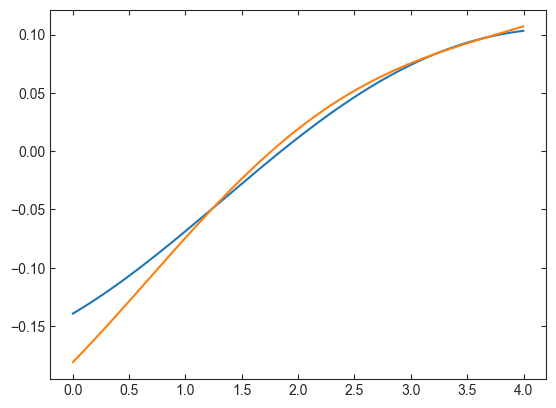

In [32]:
recent_sfrs, dust2, dust_index, dust1 = dust_prior.get_pop_cosmos_samples(9999999999)
f_preds_mu = gpdp.gp_evaluate_model(trained_model, torch.from_numpy(dust_prior.dust_index_grid))
mean_dust_index_sample = f_preds_mu.sample().numpy()
mean_dust_index = f_preds_mu.mean.detach().numpy()
delta_dust_index = mean_dust_index_sample - mean_dust_index
plt.plot(dust_prior.dust_index_grid, mean_dust_index)
plt.plot(dust_prior.dust_index_grid, mean_dust_index_sample)

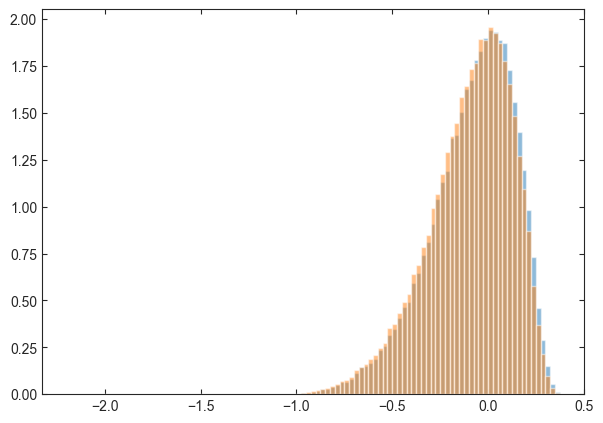

In [33]:
recent_sfrs, dust2, dust_index, dust1 = dust_prior.get_pop_cosmos_samples(9999999999)
delta = np.interp(dust2, dust_prior.dust_index_grid, delta_dust_index)
dust2s = np.random.uniform(0, 4, 1000000)
sorted_inds = dust2.argsort()[:]
sorted_dust2 = dust2[sorted_inds]
sorted_dust_index = dust_index[sorted_inds]
sorted_delta = delta[sorted_inds]

dust_index = np.interp(dust2s, sorted_dust2, sorted_dust_index)
delta = np.interp(dust2s, sorted_dust2, sorted_delta)

dust2_point = 1.0
inds = np.where((dust2s<dust2_point)&(dust2s>dust2_point-0.5))[0]

f, ax = plt.subplots(1, 1, figsize=(7, 5))
bins = np.arange(-2.2, 0.4, 0.025)
histogram = ax.hist(dust_index[inds], density=True, bins=bins, alpha=0.5)
dust_index = np.clip(dust_index + delta, -2.2, 0.4)
histogram = ax.hist(dust_index[inds], density=True, bins=bins, alpha=0.5)

In [34]:
torch.save(trained_model.state_dict(), 'gp_models/dust_index.pth')
torch.save(trained_model_sig.state_dict(), 'gp_models/dust_indexsig.pth')

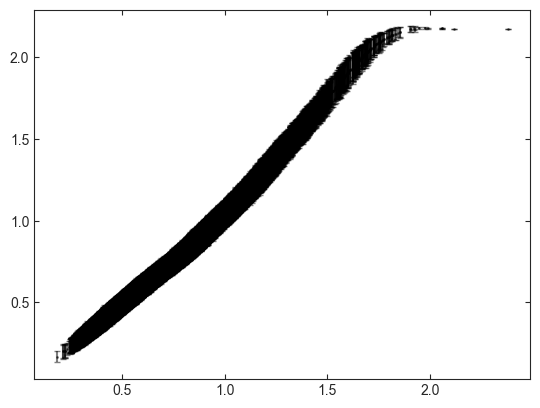

In [43]:
plt.errorbar(tau, tau1, tau1e, fmt='ko', ms=1, capsize=2, alpha=0.5)
bin_centers_de, bin_means_de, bin_std_de = gpdp.process_samples(tau, tau1, -10, -5, 2)
x, y, yerr = gpdp.process_samples_modified(tau, tau1, tau1e, -10, -5, 2)
plt.errorbar(bin_centers_de, bin_means_de, bin_std_de, fmt='ro', capsize=2)
plt.errorbar(x, y, yerr, fmt='bo', capsize=2)

bin_centers_de, bin_means_de, bin_std_de = x, y, yerr


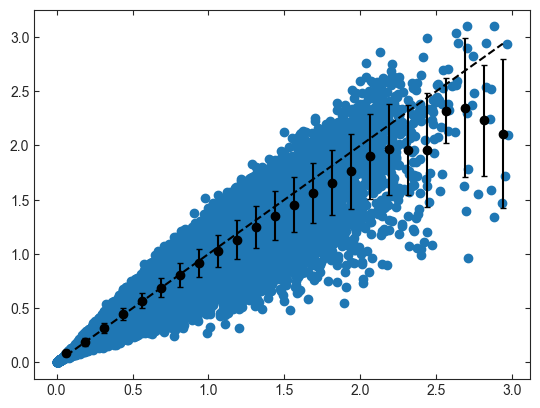

In [44]:
plt.scatter(dust2, dust1)

bin_centers, bin_means, bin_std = gpdp.process_samples(dust2, dust1, 0.0, 3.0, 25)

plt.errorbar(bin_centers, bin_means, bin_std, fmt='ko', capsize=2)
plt.errorbar(bin_centers_de, bin_means_de, bin_std_de, fmt='ro', ms=1, capsize=2)
plt.plot(bin_centers, bin_centers, c='k', ls='--')

357.10989783537553
329.71341680940617
302.15587255759976
274.61517414509586
247.285625753012
220.37655812688612
194.10970773656268
168.71560294905024
144.42912042062605
121.48407375910928
100.10678262795112
80.50863834267004
62.877752672120046
47.36987602881654
34.098912305610014
23.127546902704633
14.458737290446711
8.029065728360601
3.705163420366711
1.284490197470726
0.5015771494131409
0.4587817720847615
0.41623494982419057
0.37377934444863725
0.33146925295686996
0.2893624721416708
0.2475197855701042
0.2060048487338361
0.16488433960547827
0.1242282697626736
0.08411037479826512
0.0446085215928357
0.005805084052728153
-0.03221275177559437
-0.06935278736350516
-0.10551774915604827
-0.1406053988541701
-0.17450885588190146
-0.20711717715797953
-0.2383162454565552
-0.26799002299116775
-0.29602222989322047
-0.3222985061127778
-0.3467091076460942
-0.3691521711549466
-0.38953755194719925
-0.4077911959300111
-0.42385994418728984
-0.4377165886215711
-0.4493649010791451
-0.45884425374869564
-0.

/Users/fpetri/anaconda3/envs/tf_env/lib/python3.11/site-packages/linear_operator/utils/cholesky.py:40: NumericalWarning: A not p.d., added jitter of 1.0e-08 to the diagonal
  warnings.warn(


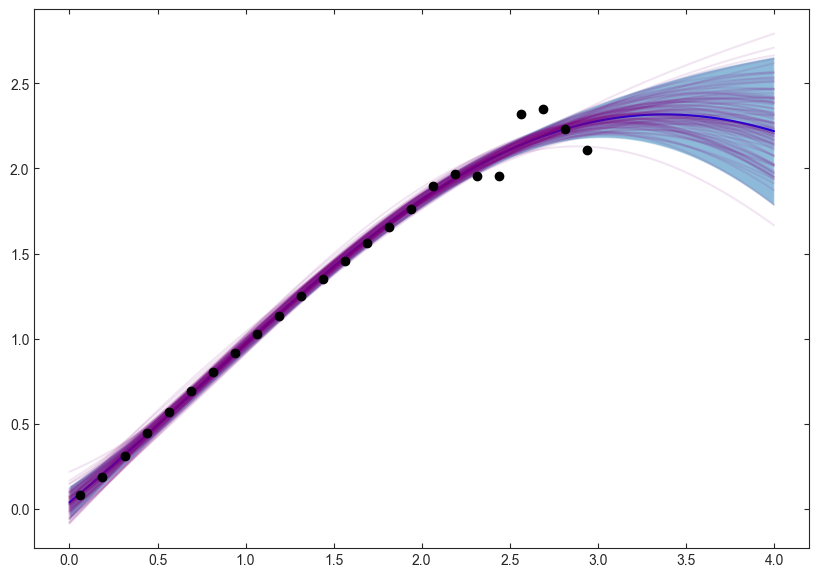

In [45]:
test_dust2 = torch.linspace(0, 4, 100)
train_dust2, train_dust1, train_dust1_errs = gpdp.training_data_to_torch(bin_centers, bin_means, bin_std, bin_centers_de, bin_means_de, bin_std_de)

trained_model, trained_likelihood = gpdp.train_gp_model_noerr(train_dust2, train_dust1, [2.0, 10.0], [-100, 100], lr=0.1, training_iter=10000)
f_preds = gpdp.gp_evaluate_model(trained_model, test_dust2)
gpdp.gp_plot_confidence_obs(f_preds, test_dust2, train_dust2, train_dust1, train_dust1_errs*0, labelx="", labely="", alpha=0.5)
for param_name, param in trained_model.named_parameters():
    print(f'Parameter name: {param_name:42} value = {param.item()}')

with torch.no_grad():
    for i in range(100):
        plt.plot(test_dust2, f_preds.sample().numpy(), c='purple', alpha=0.1)

357.0306994706363
329.63022195534154
302.06809782541063
274.5224219539474
247.1878921976769
220.27401627313077
194.00252773866325
168.60392617837735
144.31306952018846
121.36376566285935
99.98233964544134
80.38019678943732
62.74546908702349
47.23393108637382
33.95951250934277
22.98492405997702
14.313145650030783
7.880776569685664
3.5544568850586375
1.1316442987153141
0.34685419488356684
0.3024352579520792
0.2585090942641201
0.21488993344652316
0.17159426919429413
0.1286317396535803
0.08600407047161657
0.04370533941374438
0.0017239031993235288
-0.03995387935879755
-0.08133836951538814
-0.12243051872021936
-0.1632159640819407
-0.2036605269203168
-0.243708026454689
-0.2832807635417829
-0.32228238798702846
-0.36060236401333134
-0.398121031669844
-0.43471434183531826
-0.47025763589959513
-0.5046282218892167
-0.5377068467512071
-0.5693783984725858
-0.5995322629448528
-0.628062728602191
-0.6548697262554082
-0.6798600665394118
-0.702949231849773
-0.7240637082561725
-0.7431437995700562
-0.76014

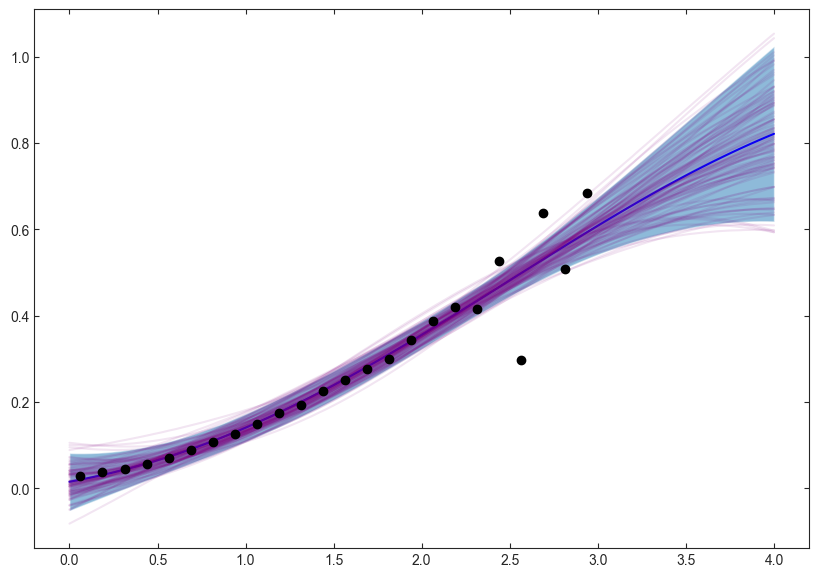

In [46]:
test_dust2 = torch.linspace(0, 4, 100)
train_dust2, train_dust1, train_dust1_errs = gpdp.training_data_to_torch(bin_centers, bin_means, bin_std, bin_centers_de, bin_means_de, bin_std_de)

trained_model_sig, trained_likelihood_sig = gpdp.train_gp_model_noerr(train_dust2, train_dust1_errs, [2.0, 10.0], [-100, 100], lr=0.1, training_iter=10000)
f_preds = gpdp.gp_evaluate_model(trained_model_sig, test_dust2)
gpdp.gp_plot_confidence_obs(f_preds, test_dust2, train_dust2, train_dust1_errs, train_dust1_errs*0, labelx="", labely="", alpha=0.5)
for param_name, param in trained_model.named_parameters():
    print(f'Parameter name: {param_name:42} value = {param.item()}')

with torch.no_grad():
    for i in range(100):
        plt.plot(test_dust2, f_preds.sample().numpy(), c='purple', alpha=0.1)

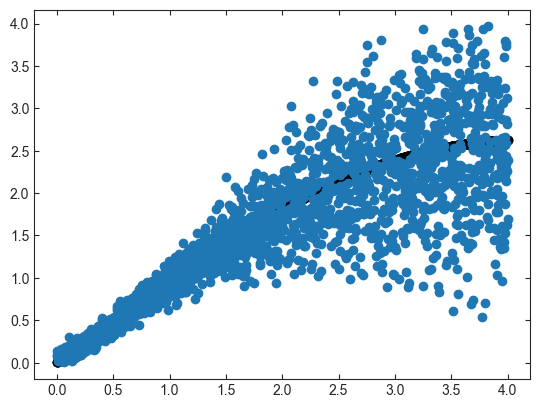

In [39]:
test_tau = torch.from_numpy(np.random.uniform(0, 4, 2000))
f_preds = gpdp.gp_evaluate_model(trained_model, test_tau)
f_preds_sig = gpdp.gp_evaluate_model(trained_model_sig, test_tau)
mean_dust1 = f_preds.sample().numpy()
sig_dust1 = f_preds_sig.sample().numpy()
sig_dust1 = np.where(sig_dust1<0.001, 0.001, sig_dust1)
#scatter = np.random.uniform(0.05, 0.4)
plt.scatter(test_tau, mean_dust1, c='k')
plt.scatter(test_tau, dp.truncated_normal(mean_dust1, sig_dust1, 0.0, 4.0, len(test_tau)))

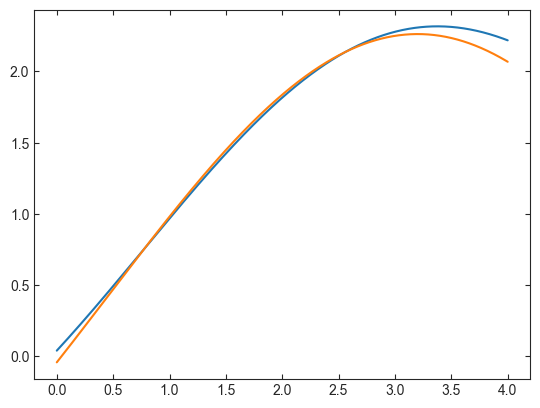

In [62]:
recent_sfrs, dust2, dust_index, dust1 = dust_prior.get_pop_cosmos_samples(9999999999)
f_preds_mu = gpdp.gp_evaluate_model(trained_model, torch.from_numpy(dust_prior.dust1_grid))
mean_dust1_sample = f_preds_mu.sample().numpy()
mean_dust1 = f_preds_mu.mean.detach().numpy()
delta_dust1 = mean_dust1_sample - mean_dust1
plt.plot(dust_prior.dust1_grid, mean_dust1)
plt.plot(dust_prior.dust1_grid, mean_dust1_sample)

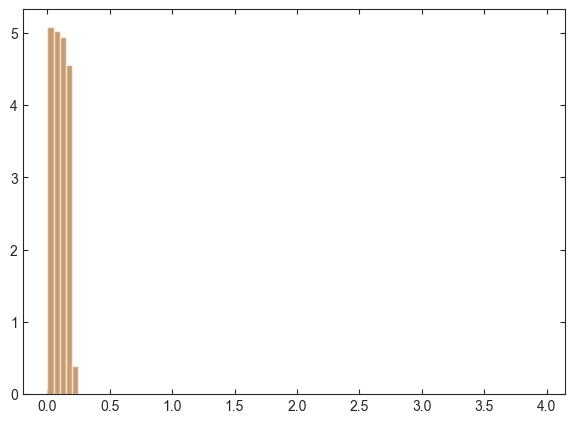

In [70]:
recent_sfrs, dust2, dust_index, dust1 = dust_prior.get_pop_cosmos_samples(9999999999)
delta = np.interp(dust2, dust_prior.dust1_grid, delta_dust1)
dust2s = np.random.uniform(0, 4, 1000000)
sorted_inds = dust2.argsort()[:]
sorted_dust2 = dust2[sorted_inds]
sorted_dust1 = dust1[sorted_inds]
sorted_delta = delta[sorted_inds]

dust1 = np.interp(dust2s, sorted_dust2, sorted_dust1)
delta = np.interp(dust2s, sorted_dust2, sorted_delta)

dust2_point = 0.2
inds = np.where((dust2s<dust2_point)&(dust2s>dust2_point-0.5))[0]

f, ax = plt.subplots(1, 1, figsize=(7, 5))
bins = np.arange(0.0, 4.0, 0.05)
histogram = ax.hist(dust1[inds], density=True, bins=bins, alpha=0.5)
dust_index = np.clip(dust1 + delta, -2.2, 0.4)
histogram = ax.hist(dust1[inds], density=True, bins=bins, alpha=0.5)

In [71]:
torch.save(trained_model.state_dict(), 'gp_models/dust1.pth')
torch.save(trained_model_sig.state_dict(), 'gp_models/dust1sig.pth')